# Assignment 15

# Chapter 11
# 11.5 Writing Mathematical Expressions
## **Question 1. (screenshot: queries and results)**
## Use Production.Product table. We want to get the name, StandardCost and ListPrice for all products that have the word “Touring” and Cost more than “zero”. We want to have a promotional sale for the “Touring” items. Use mathematical expressions on the existing columns to create a new column in the result for the sale price if we offer a 15% discount.


In [ ]:
DECLARE @DiscountRate decimal(5,2) = 0.15;

SELECT Name,
       StandardCost,
       ListPrice,
       CAST(ListPrice * (1 - @DiscountRate) AS decimal(10,2)) AS SalePrice
FROM AdventureWorks2022.Production.Product
WHERE Name LIKE '%Touring%'
      AND StandardCost > 0;

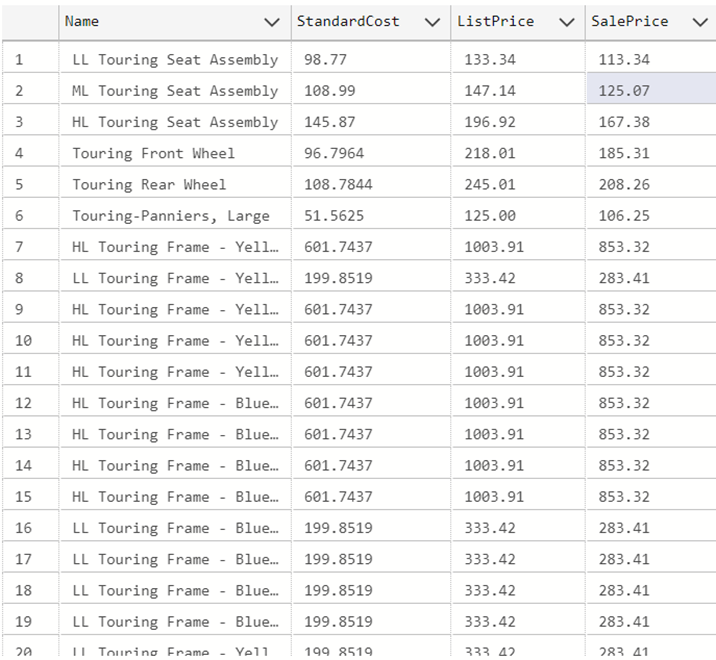

## **Question 2. (answer)**

## <u>\- How many Rows?</u>
## 54 Rows

# 11.7 Rounding
## The ROUND function allows you to round a number value to a specific number of decimal places.
## **Question 3. (screenshot: queries and results)**
## We want to report large numbers as rounded to the nearest thousand. Using the Sales.SalesOrderHeader table, get the sales by year rounded to the nearest thousand and formatted as currency. Use the OrderDate field to get your year, and the Subtotal to get your sales. Group and Order by Year. (You should have 4 rows)

In [2]:
SELECT YEAR(OrderDate) AS SalesYear,
       ROUND(SUM(Subtotal) / 1000, 0) * 1000 AS SalesRoundedToThousand
FROM AdventureWorks2022.Sales.SalesOrderHeader
GROUP BY YEAR(OrderDate)
ORDER BY SalesYear;

(4 rows affected)

Total execution time: 00:00:00.025

SalesYear,SalesRoundedToThousand
2011,12642000.00
2012,33524000.00
2013,43622000.00
2014,20058000.00


## **Question 4. (answer)**

## \- <u>What is the year with the highest sales value?</u>
## The year 2013 has the highest sales value with $43,622,000.00

## **Question 5. (screenshot: queries and results)**
## We want to report large numbers as rounded to the nearest thousand. Using the Sales.SalesOrderHeader table, get the sales by month of the year with the highest sales value, rounded to the nearest thousand and formatted as currency. Use the OrderDate field to get your month, and the Subtotal to get your sales. 

In [3]:
SELECT MONTH(OrderDate) AS SalesMonth,
       ROUND(SUM(Subtotal), -3) AS RoundedSales
FROM AdventureWorks2022.Sales.SalesOrderHeader
WHERE YEAR(OrderDate) = (SELECT Top 1
                                YEAR(OrderDate)
                         FROM AdventureWorks2022.Sales.SalesOrderHeader
                         GROUP BY YEAR(OrderDate)
                         ORDER BY SUM(Subtotal) DESC
						)
GROUP BY MONTH(OrderDate)
ORDER BY SalesMonth;

(12 rows affected)

Total execution time: 00:00:00.176

SalesMonth,RoundedSales
1,2088000.00
2,2317000.00
3,3412000.00
4,2532000.00
5,3246000.00
6,5081000.00
7,4896000.00
8,3334000.00
9,4533000.00
10,4796000.00


## **Question 6. (answer)**

## <u>\- What is the month with the highest sales value?</u>
## June has the highest sales amount with $5,081,000.00

# 11.8 Rounding Always UP or DOWN (Ceiling, Floor)
## **Question 7. (screenshot: queries and results)**
## The Production.Product table contains the weight of the products that are sold. We want to estimate the shipping weight of products by rounding up to the nearest 10. Get the name, weight and an EstimatedShippingWeight for all the products that have a weight that is not a null value.


In [ ]:
SELECT Name,
       Weight,
       CEILING(Weight / 10.0) * 10 AS EstimatedShippingWeight
FROM AdventureWorks2022.Production.Product
WHERE Weight IS NOT NULL
ORDER BY EstimatedShippingWeight DESC;

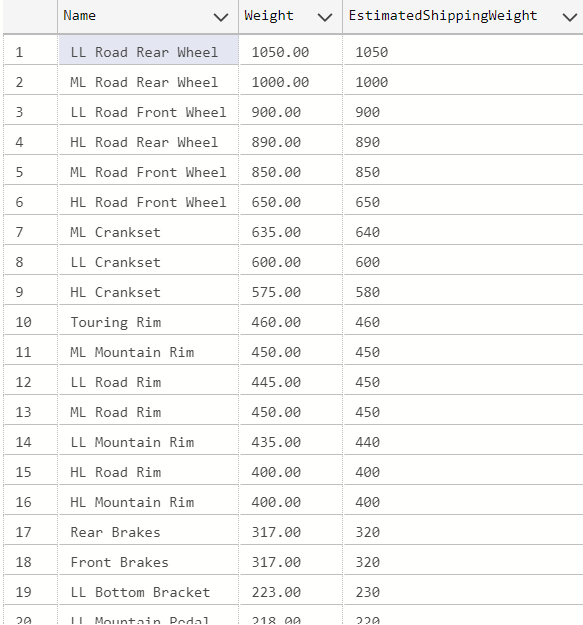

## **Question 8. (answer)**
## <u>- Which product weighs the most?</u>
## The LL Road Rear Wheel is the product with the most wieght with 1050

# 11.11 Treat NULLS as Zeros (if you are sure you want to!)
## **Question 9. (screenshot: queries and results)**
## SELECT SpecialOfferID, MaxQty, COALESCE(MaxQty, 0) AS MaxQtyAlt FROM Sales.SpecialOffer


In [7]:
SELECT SpecialOfferID, MaxQty, COALESCE(MaxQty, 0) AS MaxQtyAlt 
FROM AdventureWorks2022.Sales.SpecialOffer

(16 rows affected)

Total execution time: 00:00:00.013

SpecialOfferID,MaxQty,MaxQtyAlt
1,NULL,0
2,14,14
3,24,24
4,40,40
5,60,60
6,NULL,0
7,NULL,0
8,NULL,0
9,NULL,0
10,NULL,0


## **Question 10. (explanation)**
## <u>What are some reasons that we should be careful about converting NULL values to ZEROs?</u>
## Converting NULLs to zeros might mess with data integrity, especially if those NULLs were meant to show something specific (like "no data" instead of "zero"). Treating missing data as zeros could skew analysis or reports, giving a misleading picture of the situation.